# Исследование объявлений о продаже квартир

Необходимо на осовании данных сервиса Яндекс.Недвижимость определить рыночную стоимость объектов недвижимости и типичные параметры квартир

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
display(df.shape)
display(df.info())

(23699, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

Булевый тип данных у столбцов studio, open_plan

Строковый у столбцов first_day_exposition, is_apartment, locality_name

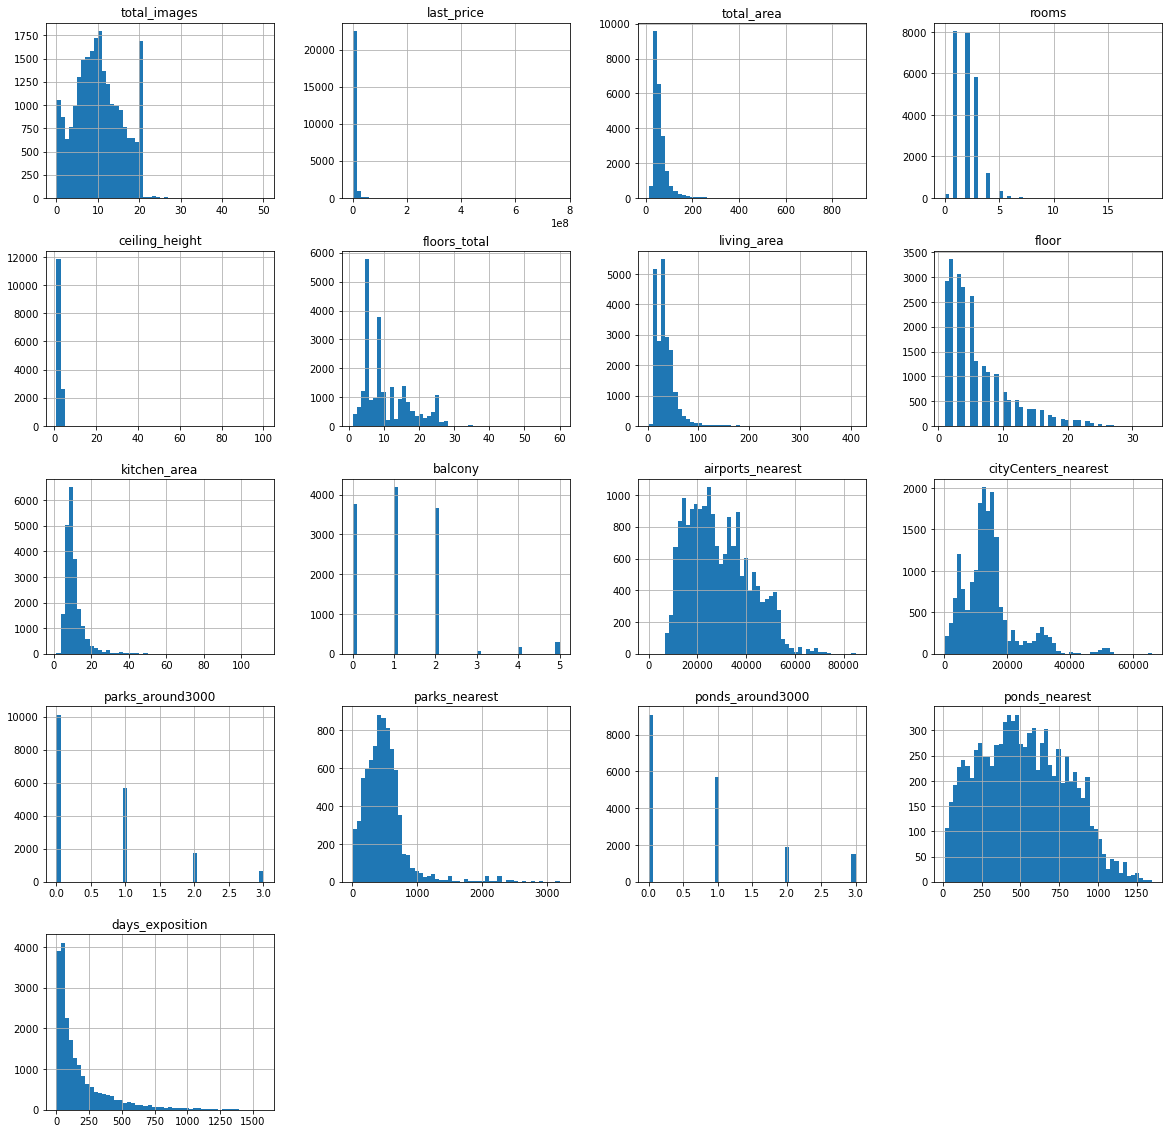

In [4]:
df.hist(figsize=(20,20), bins=50);

По данным на текущем этапе можно сделать вывод,что:
1) Количество фотографий квартиры в среднем составляет ок. 10. Варьируется от 0 до 20, более 20 фотографий встречается в единичных случаях

2) Вывод о цене по данному графику сделать сложно, необходим дополнительный.

3) Общая площадь в среднем ок. 50 кв.м. Минимальная примерно 20, максимальная ок. 250, но площадь большинства квартир не превышает 200 кв.м. График необходимо укрупнить

4) Большинство квартир 2х и 3х комнатные. Основная часть квартир находится в пределах от 1 до 5 комнат, 6 и 7 комнатные квартиры единичные

5) График не позволяет сделать вывод о высоте потолков

6) Общее количество этажей колеблется от 1 до 28. Есть показатель примерно на уровне 35 этажей. большее число квартир находится на 5 этаже

7) Жилая площадь составляет от 20 до 180 кв.м. Подъемы на уровне 35 и 50 кв.м

8) Этаж квартиры соответствует распределению Пуассона. 

9) Площадь кухни варьируется от 3 до 30 кв.м. Подъем на уровнре 10 кв.м. Есть квартиры с кухней более 40 кв.м

10) В большинстве квартир есть 1 балкон или балкона вообще нет. Есть квартиры с 4 и 5 балконами

11) большинство квартир расположено в от 10 до 80 км от аэропорта. В среднем - в 25 км. Есть подъемы на уровне 15 и 35 км

12) Большинство квартир расположены от 0 до 40км от центра города. Среднее - примерно 17 км.

13) Чаще всего в округе нет парка. Более 3 парков не встречается

14) Если парк есть, то он в среднем расположен в 500м от дома

15) Чаще всего в округе нет водоема. Более 3 водоемов не встречается

16) Распределение расстояния до ближайшего водоема стремится к нормальному. В среднем - в 500м

17) Большинство объявлений было размещено ок 70 дней. Максимум - 1350

<AxesSubplot:>

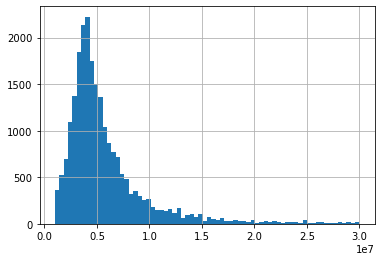

In [5]:
df['last_price'].hist(bins=70, range=(1000000, 30000000))

Средняя цена составляет примерно 3,5 млн. Цена варьируется от 1,5 до 20 млн

Высота потолков в среднем составляет 2,5 м

### Предобработка данных

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Изменение типа данных

Изменяем типы данных в 2 категориях: дата первой публикации и апартаменты. В первом случае меняем на datetime, во втором - на bool

In [7]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [8]:
display(df['is_apartment'].unique())

array([nan, False, True], dtype=object)

In [9]:
df['is_apartment']=df['is_apartment'].fillna('False')

In [10]:
df['is_apartment']= df['is_apartment'].astype('bool')

#### Пропуски в данных о высоте потолков

In [11]:
df['ceiling_height'].isna().sum()

9195

In [12]:
display(df['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

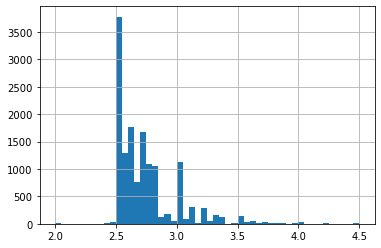

In [13]:
df['ceiling_height'].hist(bins=50, range=(2, 4.5))

<AxesSubplot:>

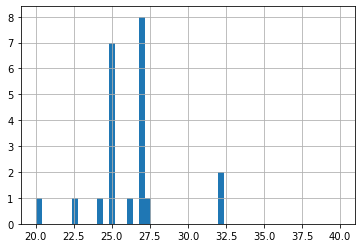

In [14]:
df['ceiling_height'].hist(bins=50, range=(20,40))

Большинство квартир имеет высоту потолков от 2,5 до 2,8 м. Минимальное значение - 1м. Максимальное - 100м. Скорее всего, это выбросы.
Пропущенные значения можно заполнить медианой

In [15]:
display(df.loc[df['ceiling_height']>4.5, 'total_images'].count())

42

In [16]:
display(df.loc[df['ceiling_height']<2.4, 'total_images'].count())

21

Скорее всего, высота потолков более 20м - техническая ошибка, пропук разделительной запятой. Это можно исправить, разделив значения на 10.

In [17]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height']<20, df['ceiling_height']/10)

Квартиры с высотой потолков менее 2,4 и более 4.5 м можно считать выбросами и их следует удалить.

In [18]:
display(df.loc[df['ceiling_height']<2.4, 'total_images'].count())

23

In [19]:
display(df.loc[df['ceiling_height']>4, 'total_images'].count())

53

In [20]:
df=df.query('2.4<=ceiling_height<=4 or ceiling_height.isna()')

Пропущенные значения можно заполнить медианой

In [21]:
value = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(value)

<AxesSubplot:>

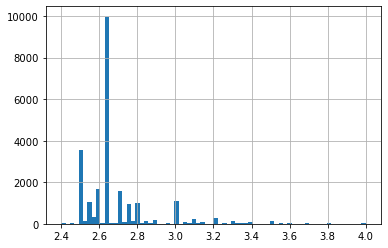

In [22]:
df['ceiling_height'].hist(bins=70)

In [23]:
display(df['ceiling_height'].describe())

count    23623.000000
mean         2.693781
std          0.204084
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

#### Заполнение пропусков жилой площади помещения

<AxesSubplot:xlabel='living_area', ylabel='total_area'>

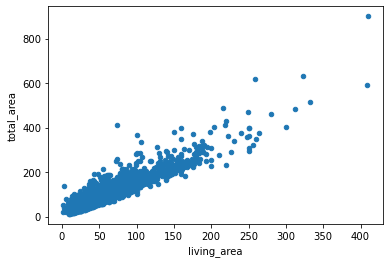

In [24]:
 df.plot(x='living_area', y='total_area', kind='scatter')

In [25]:
df['total_area'].describe()

count    23623.000000
mean        60.185309
std         35.041768
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [26]:
df['living_area'].describe()

count    21729.000000
mean        34.354676
std         21.650407
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

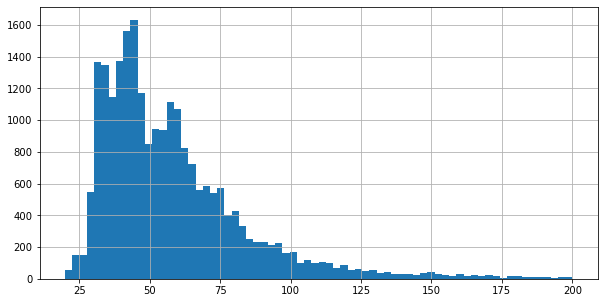

In [27]:
df['total_area'].hist(bins=70, range=(20,200), figsize=(10,5))

<AxesSubplot:>

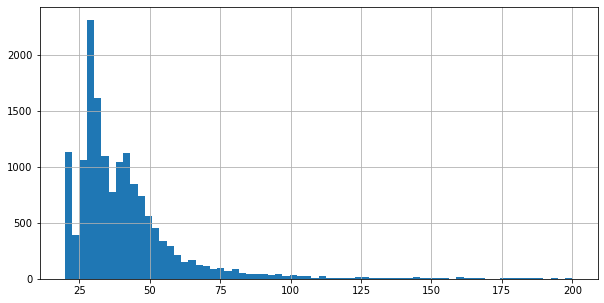

In [28]:
df['living_area'].hist(bins=70, range=(20,200), figsize=(10,5))

In [29]:
df=df.query('20<total_area<400')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23479 non-null  float64       
 7   living_area           21689 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21332 non-null  float64       
 13  balcony         

In [30]:
df['total_area'].corr(df['living_area'])

0.9354436727129167

Связь между общей и жилой площадью прямая, сильная. В данных об общей площади нет пропусков, можно заполнить пропуски жилой площади на основании общей.

In [31]:
df['living_to_total']=df['living_area']/df['total_area']
display(df['living_to_total'].describe())
coef_area = df['living_to_total'].mean()
print(coef_area)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13508\1869846222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['living_to_total']=df['living_area']/df['total_area']


count    21689.000000
mean         0.564449
std          0.105077
min          0.021583
25%          0.495050
50%          0.567568
75%          0.637500
max          1.000000
Name: living_to_total, dtype: float64

0.5644493806629199


In [32]:
df['living_area'] = df['living_area'].fillna(df['total_area']*coef_area)


C:\Users\Asus\AppData\Local\Temp\ipykernel_13508\1993744228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['living_area'] = df['living_area'].fillna(df['total_area']*coef_area)


Таким образом, я отбросила квартиры с общей площадью менее 20 и более 300 кв.м.

Затем я посчитала среднее соотношение между жилой и общей площадью и заполнила пропуске в пукте жилая площадь на основании данных об общей площади и полученного соотношения.

#### Изменение типов населенных пунктов

In [33]:
display(len(df['locality_name'].unique()))

365

In [34]:
df['locality_name_new'] = df['locality_name'].str.replace('ё','е')
df['locality_name_new'] = df['locality_name_new'].str.replace('поселок городского типа','поселок')
df['locality_name_new'] = df['locality_name_new'].str.replace('городской поселок','поселок')
df['locality_name_new'] = df['locality_name_new'].str.replace('при железнодорожной ','')
df['locality_name_new'] = df['locality_name_new'].str.replace('деревня Кудрово','Кудрово')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13508\4096304141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality_name_new'] = df['locality_name'].str.replace('ё','е')
C:\Users\Asus\AppData\Local\Temp\ipykernel_13508\4096304141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality_name_new'] = df['locality_name_new'].str.replace('поселок городского типа','поселок')
C:\Users\Asus\AppData\Local\Temp\ipykernel_13508\4096304141.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [35]:
display(len(df['locality_name_new'].unique()))

320

### Заполнение пропусков в столбце Балконы

Предполагаю, что если значение не указано, то балкона нет. Заполню пропуски цифрой 0

In [36]:
df['balcony'] = df['balcony'].fillna(0)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13508\193950032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].fillna(0)


### Парки и водоемы поблизости

Ели во всем населенном пункте это значение пропущено, можно предположить, что здесь нет ни одного парка или водоема. Заполнять это значение медианой некорректно, так как у нас нет информации о расположении квартиры

In [37]:
df.groupby('locality_name_new')['parks_nearest'].count().sort_values(ascending=False)

locality_name_new
Санкт-Петербург      7222
Пушкин                212
Петергоф              143
Колпино               133
Кронштадт              87
                     ... 
деревня Пчева           0
деревня Пустынка        0
деревня Пудомяги        0
деревня Пикколово       0
село Шум                0
Name: parks_nearest, Length: 319, dtype: int64

In [38]:
df.groupby('locality_name_new')['ponds_nearest'].count().sort_values(ascending=False)

locality_name_new
Санкт-Петербург      7913
Колпино               190
Пушкин                176
поселок Шушары        152
Сестрорецк            135
                     ... 
деревня Пустынка        0
деревня Пудомяги        0
деревня Пикколово       0
деревня Пижма           0
село Шум                0
Name: ponds_nearest, Length: 319, dtype: int64

### Число парков и водоемов в радиусе 3 км

Скорее всего, если это значение не указано, то и парка/водоема поблизости нет. Можно заполнить пропуски нyлем

In [39]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13508\3208402315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13508\3208402315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parks_around3000'] = df['parks_around3000'].fillna(0)


### Поиск аномалий в оставшихся столбцах

In [40]:
df['days_exposition'].describe()

count    20403.000000
mean       180.819585
std        219.583342
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [41]:
df.query('days_exposition<5')['days_exposition'].describe()

count    335.000000
mean       3.507463
std        0.535370
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: days_exposition, dtype: float64

In [42]:
df.query('days_exposition>1000')['days_exposition'].describe()

count     273.000000
mean     1170.373626
std       133.929496
min      1001.000000
25%      1069.000000
50%      1141.000000
75%      1240.000000
max      1580.000000
Name: days_exposition, dtype: float64

Удалим аномальные значения размещения объявлений

In [43]:
df=df.query('5<=days_exposition<=1000 or days_exposition.isna()')

In [44]:
df['floors_total'].describe()

count    22874.00000
mean        10.68615
std          6.59898
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         60.00000
Name: floors_total, dtype: float64

<AxesSubplot:>

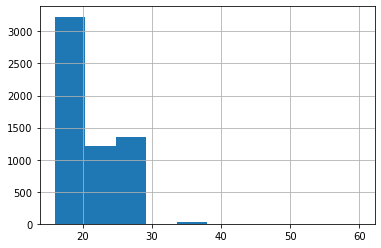

In [45]:
df['floors_total'].hist(range=(16,60))

Значения этажей больше 29 можно считать выбросами.

In [46]:
df=df.query('floors_total<29 or floors_total.isna()')

In [47]:
df['rooms'].describe()

count    22926.000000
mean         2.065210
std          1.060226
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [48]:
df.query('rooms>6')['rooms'].describe()

count    75.000000
mean      7.920000
std       1.936561
min       7.000000
25%       7.000000
50%       7.000000
75%       8.000000
max      19.000000
Name: rooms, dtype: float64

Всего 76 квартир имеют более 6 комнат. Эти значения можно считать аномалиями.

In [49]:
df=df.query('rooms<=6 or rooms.isna()')

In [50]:
df['kitchen_area'].describe()

count    20666.000000
mean        10.469285
std          5.645153
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [51]:
df.query('kitchen_area>45')['kitchen_area'].describe()

count     55.000000
mean      59.247273
std       14.167606
min       46.000000
25%       50.000000
50%       54.200000
75%       64.000000
max      107.000000
Name: kitchen_area, dtype: float64

In [52]:
df.query('kitchen_area<5')['kitchen_area'].describe()

count    96.000000
mean      4.068646
std       0.806877
min       1.300000
25%       4.000000
50%       4.050000
75%       4.700000
max       4.900000
Name: kitchen_area, dtype: float64

Всего 59 квартир имеют кухни более 45 кв.м. и 98 квартир имеют кухни площадью менее 5 кв.м.

In [53]:
df = df.query('5<=kitchen_area<=45 or kitchen_area.isna()')

In [54]:
df['last_price_mln']=df['last_price']/1000000
df['last_price_mln'].describe()

count    22700.000000
mean         6.193281
std          7.484833
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price_mln, dtype: float64

In [55]:
df.query('last_price_mln<1')['last_price_mln'].describe()

count    220.000000
mean       0.766850
std        0.162718
min        0.012190
25%        0.650000
50%        0.790000
75%        0.900000
max        0.999999
Name: last_price_mln, dtype: float64

In [56]:
df.query('last_price_mln>40')['last_price_mln'].describe()

count    120.000000
mean      75.636645
std       45.789721
min       40.348248
25%       49.900000
50%       60.654450
75%       80.490000
max      330.000000
Name: last_price_mln, dtype: float64

220 квартир стоили менее 1 млн и 122 квартиры стоили более 40 млн

In [57]:
df = df.query('1<=last_price_mln<=40 or last_price_mln.isna()')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22360 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22360 non-null  int64         
 1   last_price            22360 non-null  float64       
 2   total_area            22360 non-null  float64       
 3   first_day_exposition  22360 non-null  datetime64[ns]
 4   rooms                 22360 non-null  int64         
 5   ceiling_height        22360 non-null  float64       
 6   floors_total          22279 non-null  float64       
 7   living_area           22360 non-null  float64       
 8   floor                 22360 non-null  int64         
 9   is_apartment          22360 non-null  bool          
 10  studio                22360 non-null  bool          
 11  open_plan             22360 non-null  bool          
 12  kitchen_area          20236 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [59]:
#Цена за 1 кв.м. в тыс.руб
df['sq_met_price']=df['last_price']/df['total_area']/1000


In [60]:
# День недели, меяц, год публикации объявления
df['week_day']=df['first_day_exposition'].dt.weekday
df['month']=df['first_day_exposition'].dt.month
df['year']=df['first_day_exposition'].dt.year


In [61]:
#Определение типа этажа
def floor_type(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'
df['floor_type'] = df.apply(floor_type, axis=1)


In [62]:
df['city_center_km']= round(df['cityCenters_nearest']/1000)

### Проведите исследовательский анализ данных

AxesSubplot(0.125,0.125;0.775x0.755)


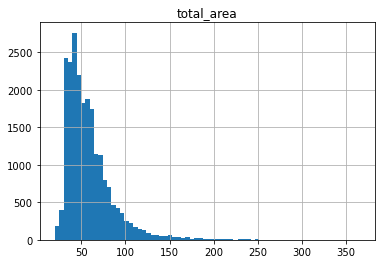


AxesSubplot(0.125,0.125;0.775x0.755)


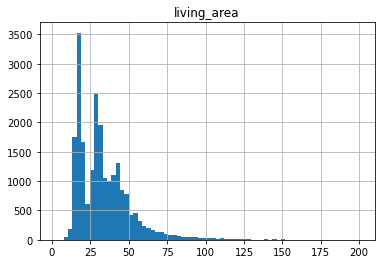


AxesSubplot(0.125,0.125;0.775x0.755)


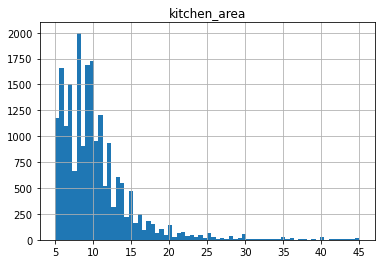


AxesSubplot(0.125,0.125;0.775x0.755)


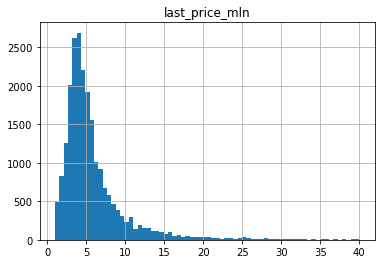


AxesSubplot(0.125,0.125;0.775x0.755)


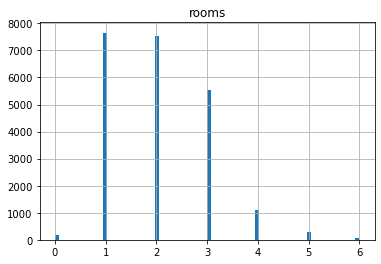


AxesSubplot(0.125,0.125;0.775x0.755)


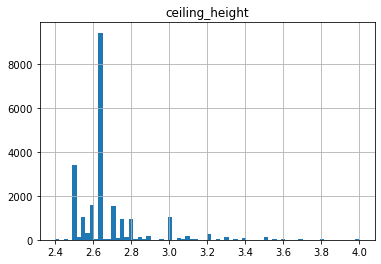


AxesSubplot(0.125,0.125;0.775x0.755)


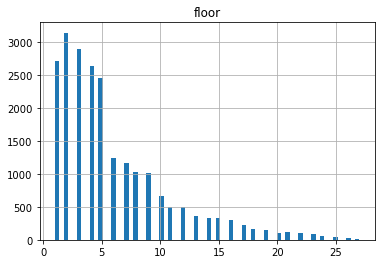


AxesSubplot(0.125,0.125;0.775x0.755)


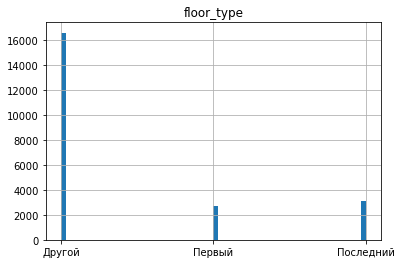


AxesSubplot(0.125,0.125;0.775x0.755)


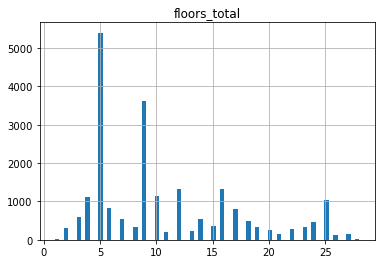


AxesSubplot(0.125,0.125;0.775x0.755)


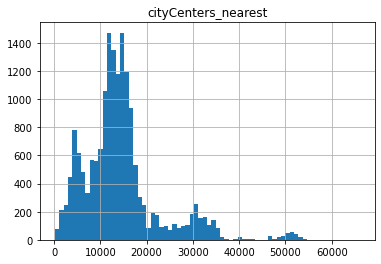


AxesSubplot(0.125,0.125;0.775x0.755)


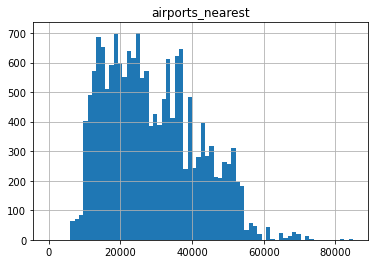


AxesSubplot(0.125,0.125;0.775x0.755)


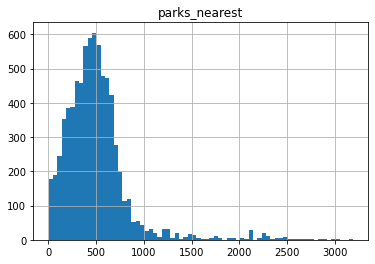


AxesSubplot(0.125,0.125;0.775x0.755)


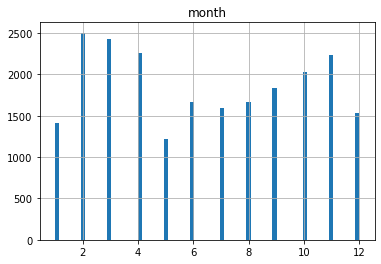


AxesSubplot(0.125,0.125;0.775x0.755)


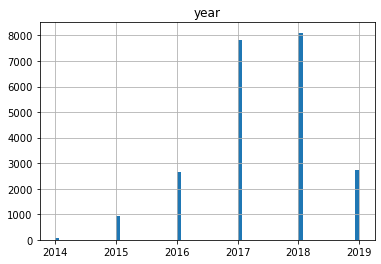


AxesSubplot(0.125,0.125;0.775x0.755)


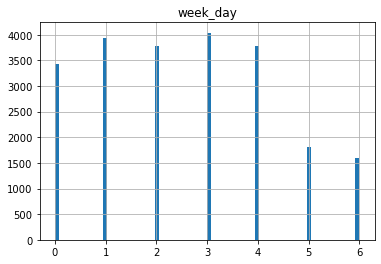

In [63]:
columns = [
    'total_area', 'living_area', 'kitchen_area', 'last_price_mln', 'rooms', 'ceiling_height', 'floor', 
    'floor_type', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'month', 'year', 'week_day'
]

for i in columns:
    print(df[i].hist(bins=70))
    plt.title(i)
    plt.show()
    print('')

Площадь большинства квартир находится в пределах от 25 до 100 кв.м.

Жилая площадь большиства квартир составляет 12-60 кв.м. Максимум - на уровне 18 кв м, на ур. 25 кв.м наблюдается провал

Площадь кухни в осовном составляет от 5 до 15 кв м. Есть подъемы и провалы

Окончательная цена в среднем варьируется от 2 до 10 млн. Стремится к нормальному распределению

В большинстве квартир 1/2/3 комнаты. 0 комнат в квартирах-студиях

Высота потолков большинства квартир составляет от 2,5 до 2,8м. Подъем графика - на уровне 2,7м

Большинство квартир расположены до 5 этажа жилого дома

Большинство квартир не расположены ни на первом, ни на последнем этаже

Подъемы наблюдаются на урове 5 и 9 этажей.

Пик - на уровне 13км. от центра города.

До ближайшего аэропорта расстояние колеблется от 10 до 40 км

Расстояние До ближайшего парка от большиства домов составляет 500 м. На ур. 0 м также дотаточно домов, что говоит, что в пределах 3км от этих домов нет парка.

В целом, во все меяцы года размещались объявлеия. Спад в январе и мае.

Большиство представленных объявлений размещены в 2017 и 2018 годах

Большинство объявлений размещено в будние дни. 

## Скорость продажи объектов

<AxesSubplot:>

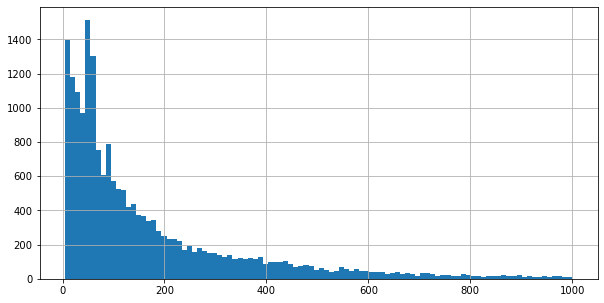

In [64]:
df['days_exposition'].hist(bins=100, figsize=(10,5))

In [65]:
df['days_exposition'].describe()

count    19333.000000
mean       169.304195
std        187.096268
min          5.000000
25%         45.000000
50%         95.000000
75%        224.000000
max       1000.000000
Name: days_exposition, dtype: float64

In [66]:
df['days_exposition'].median()

95.0

Среднее время продажи квартиры составляет 170 дней. Медианное время (оно также выбивается на графике) составляет 95 дней. 

Можно считать продажу быстрой, если квартиру купили менее, чем за 45 дней.

Продажу можно считать дологй, если объявление висело более 225 дней.

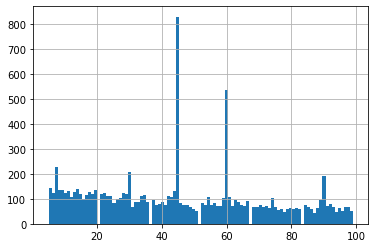

In [67]:
(
    df
    .query('days_exposition<100')['days_exposition']
    .hist(bins=100)
);

Резкий подъем наблюдается на уровне 1 квартиля - 45 дней, а также на уровне 60 и 90 дней. Это можно объяснить особенностью работы сервиса.

## Влияние факторов на стоимость

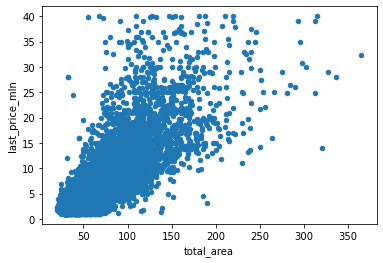

In [68]:
df.plot(x='total_area', y='last_price_mln', kind='scatter');

In [69]:
df['total_area'].corr(df['last_price_mln'])

0.784068703352528

Связь между общей площадью и ценой сильная прямая

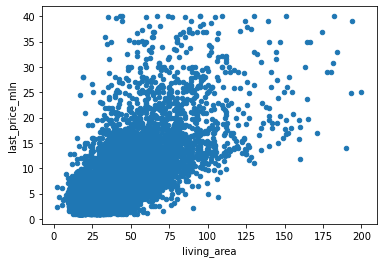

In [70]:
df.plot(x='living_area', y='last_price_mln', kind='scatter');

In [71]:
df['living_area'].corr(df['last_price_mln'])

0.6895920562948566

Связь между жилой площадью и ценой средняя прямая

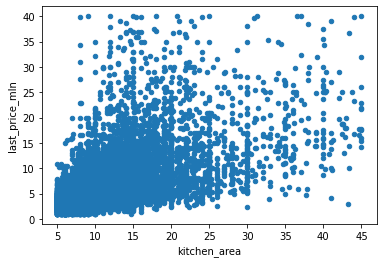

In [72]:
df.plot(x='kitchen_area', y='last_price_mln', kind='scatter');

In [73]:
df['kitchen_area'].corr(df['last_price_mln'])

0.5970875178974038

Связь между площадью кухни и ценой средняя прямая

,last_price_mln
rooms,
0,3.028741
1,3.862391
2,5.522948
3,7.612944
4,10.835020
5,14.897059
6,18.696233


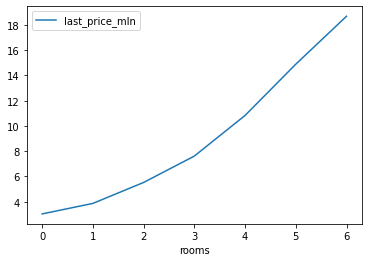

In [74]:
display(df.pivot_table(index='rooms', values='last_price_mln'))
df.pivot_table(index='rooms', values='last_price_mln').plot();

In [75]:
df['rooms'].corr(df['last_price_mln'])

0.4959174637860817

Связь между количеством комнат и ценой средняя прямая

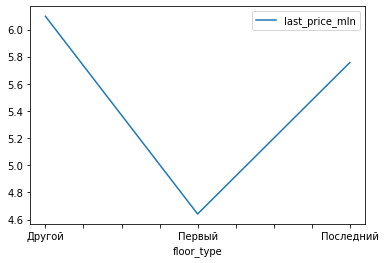

In [76]:
df.pivot_table(index='floor_type', values='last_price_mln').plot();

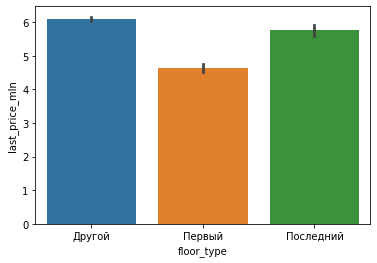

In [77]:
seaborn.barplot(x=df['floor_type'], y=df['last_price_mln']);

,last_price_mln
month,
1,5.920603
2,5.900981
3,5.826085
4,5.860764
5,5.936463
6,5.710102
7,5.841666
8,5.912332
9,5.945389


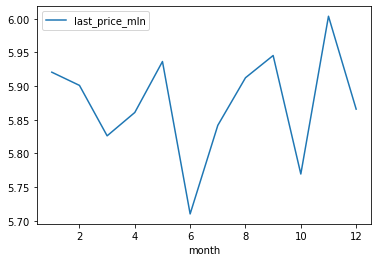

In [78]:
display(df.pivot_table(index='month', values='last_price_mln'))
df.pivot_table(index='month', values='last_price_mln').plot();

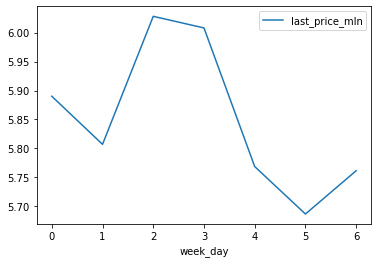

In [79]:
df.pivot_table(index='week_day', values='last_price_mln').plot();

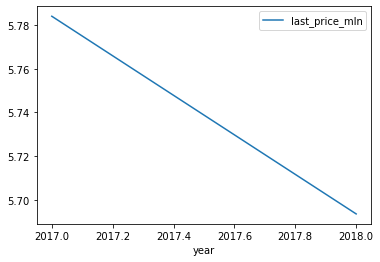

In [80]:
(
    df
    .query('2016<year<2019')
    .pivot_table(index='year', values='last_price_mln')
    .plot()
);

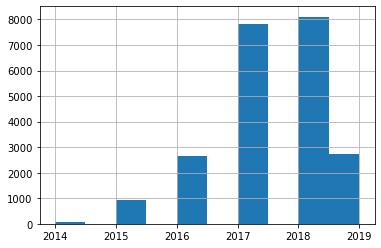

In [81]:
df['year'].hist();

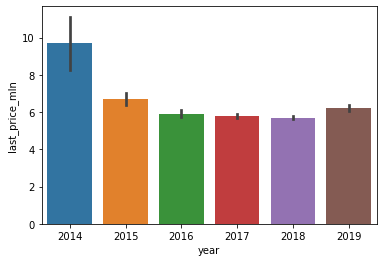

In [82]:
seaborn.barplot(x=df['year'], y=df['last_price_mln']);

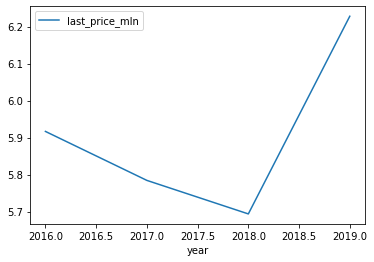

In [83]:
(
    df
    .query('2016<=year<=2019')
    .pivot_table(index='year', values='last_price_mln')
    .plot()
);

### Промежуточный вывод

Наиболее сильная зависимость наблюдается между общей площадью и итоговой ценой. Выше площадь - выше цена. При площади более 200 кв.м. зависимости нет. Скорее всего, это связано с небольшим количеством таких объявлений.

Средняя прямая связь между итоговой ценой и жилой площадью квартиры, площадью кухни, количеством комнат. 

При расположении квартиры на 1 этаже итоговая цена значительно снижаетя.

Самая высокая цена - при продаже в 5, 9, 11 месяцы. Самая низкая - в 6 и 10. Однако разница средней цены здесь незначительна (мин- 5.7, макс- 6.0)

Больше стоили квартиры, объявления которых были размещены в среду или четверг. Меньше - в субботу

Связь между ценой и годом продажи оценить сложно - достаточно информации только по 2017 и 2018 году. 

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [84]:
locality_ten = df.pivot_table(index='locality_name_new', values='total_area', aggfunc='count')
locality_ten.columns = ['number_of_ads']
locality_ten = locality_ten.sort_values(by = 'number_of_ads', ascending=False).head(10)

In [85]:
df['group_name'] = (
    df['locality_name_new']
    .where(df['locality_name_new'].isin(locality_ten.index), 'Другие')
)

display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,locality_name_new,last_price_mln,sq_met_price,week_day,month,year,floor_type,city_center_km,group_name
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00000,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,Санкт-Петербург,13.000,120.370370,3,3,2019,Другой,16.0,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60000,1,True,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,поселок Шушары,3.350,82.920792,1,12,2018,Первый,19.0,поселок Шушары
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30000,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,Санкт-Петербург,5.196,92.785714,3,8,2015,Другой,14.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00000,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,Санкт-Петербург,10.000,100.000000,1,6,2018,Другой,8.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40000,5,True,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,0.473684,поселок Янино-1,2.890,95.065789,0,9,2018,Другой,NaN,Другие
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30000,3,True,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,0.547792,Санкт-Петербург,9.700,72.490845,1,3,2017,Другой,4.0,Санкт-Петербург
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.00000,4,True,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,0.644068,Тосно,3.100,52.542373,0,1,2018,Другой,NaN,Другие
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.70000,1,True,False,False,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.523810,село Рождествено,2.500,44.091711,6,2,2018,Первый,NaN,Другие
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,43.32149,12,True,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,NaN,Санкт-Петербург,11.475,149.511401,1,3,2017,Другой,10.0,Санкт-Петербург


,sq_met_price
group_name,
Всеволожск,68.915444
Выборг,58.782196
Гатчина,69.071006
Другие,61.082436
Колпино,75.203128
Кудрово,95.285241
Пушкин,102.592249
Санкт-Петербург,111.434486
поселок Мурино,85.547835


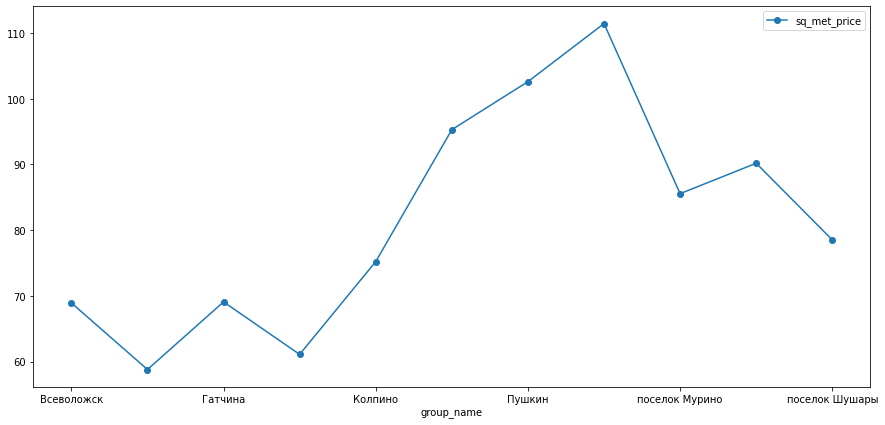

In [86]:
data = df.pivot_table(index = 'group_name', values='sq_met_price')
display(data)
data.plot(style='o-', figsize=(15,7));

Самая высокая цена за кв м в Санкт-Петербурге. Самая низкая - в Выборге

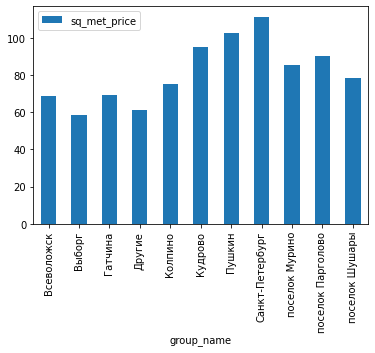

In [87]:
data.plot(y='sq_met_price', kind='bar');

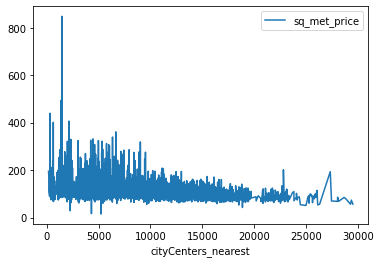

In [88]:
(
    df
    .query('locality_name_new=="Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest', values='sq_met_price')
    .plot()
);

In [89]:
data = df.query('locality_name_new=="Санкт-Петербург"')
data['cityCenters_nearest'].corr(data['sq_met_price'])

-0.3380502282151866

Таким образом, максимальная цена за кв.м. у квартир в пределах 2 км. от центра. Далее связь слабая обратая - чем больше расстояние от центра, тем ниже цена. Центром можно считать расстояние до 10км.

### Общий вывод

1. Наиболее сильная зависимость наблюдается между общей площадью и итоговой ценой. Выше площадь - выше цена. При площади более 200 кв.м. зависимости нет. Скорее всего, это связано с небольшим количеством таких объявлений.

2. Средняя прямая связь между итоговой ценой и жилой площадью квартиры, площадью кухни, количеством комнат. 

3. При расположении квартиры на 1 этаже итоговая цена значительно снижаетя.

4. Самая высокая цена - при продаже в 5, 9, 11 месяцы. Самая низкая - в 6 и 10. Однако разница средней цены здесь незначительна (мин- 5.7, макс- 6.0)

5. Больше стоили квартиры, объявления которых были размещены в среду или четверг. Меньше - в субботу

6. Связь между ценой и годом продажи оценить сложно - достаточно информации только по 2017 и 2018 году. 

7. 10 населенных пунктов с наибольшим количеством объявлений: Санкт-Петербург, Всеволожск, Выборг, Гатчина, Колпино, Кудрово, Пушкин, поселок Мурино, поселок Парголово, поселок Шушары. Самая высокая цена за кв.м. в Петербурге - 111,5 тыс. руб. Самая низкая - в Выборге (58,8 тыс.).

8. Связь между расстоянием от центра Петербурга и стоимостью кв.м. слабая отрицательная. Однако наблюдается резкое увеличение цены в пределах 2км. от центра города